In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
Train_dir ="/content/drive/MyDrive/Cotton Disease/train"
Test_dir ="/content/drive/MyDrive/Cotton Disease/test"
Valid_dir ="/content/drive/MyDrive/Cotton Disease/val"

In [3]:
print(len(Train_dir))
print(len(Test_dir))
print(len(Valid_dir))

43
42
41


In [4]:
Train_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.3,
                              rotation_range=0.2,
                              zoom_range=0.3,
                              width_shift_range=0.4,
                              height_shift_range=0.4,
                              fill_mode="nearest",
                              horizontal_flip=True,
                              vertical_flip=True)

In [5]:
Valid_data =ImageDataGenerator(rescale=1./255)

In [6]:
Train_data_gen=Train_data.flow_from_directory(Train_dir,
                                              target_size=(224,224),
                                              batch_size=8,
                                              class_mode="binary",
                                              )

Found 1951 images belonging to 4 classes.


In [7]:
Valid_data_gen=Valid_data.flow_from_directory(Valid_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=8)

Found 253 images belonging to 4 classes.


In [8]:
def plotImges(image_arr):
  fig , axes =plt.subplots(1,5, figsize=(20,20))
  axes =axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

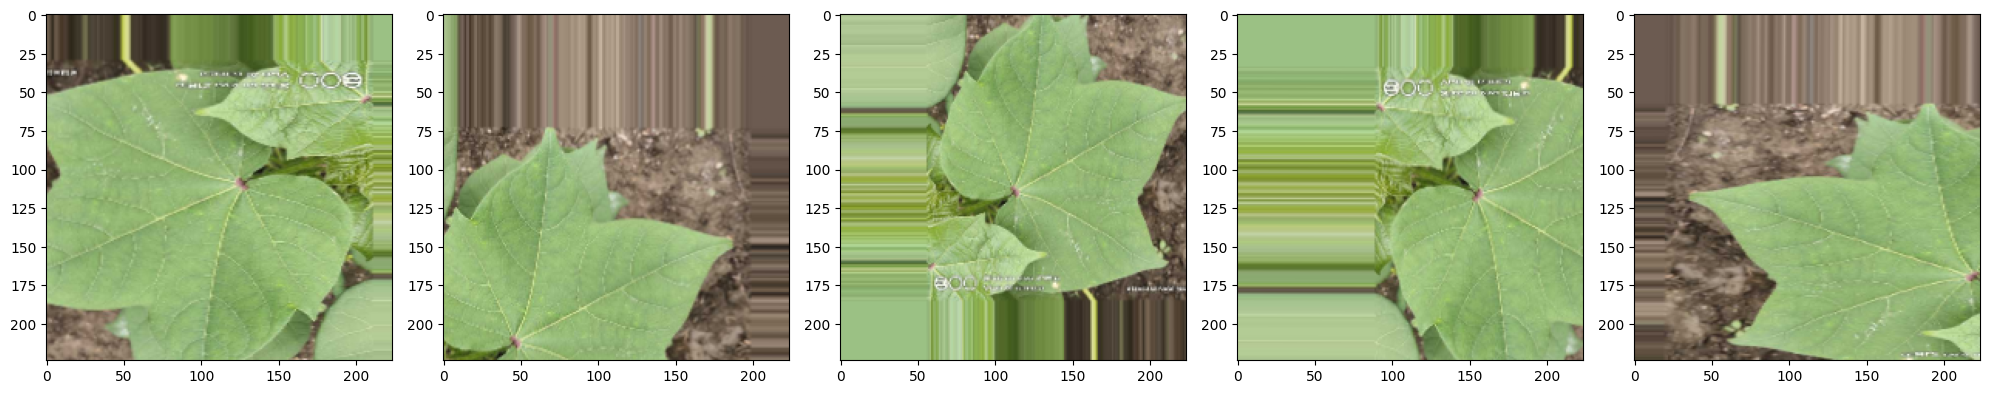

In [9]:
images = [Train_data_gen[0][0][0] for i in range(5)]
plotImges(images)

In [10]:
vgg_model=Sequential()
vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
for layer in vgg_model.layers:
  layer.trainable=False


In [12]:
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(553,activation="relu"))
vgg_model.add(Dense(4, activation="softmax"))

In [13]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 553)               283689    
                                                                 
 dense_1 (Dense)             (None, 4)                 2216      
                                                                 
Total params: 15,000,593
Trainable params: 15,000,593
Non-trainable params: 0
_________________________________________________________________


In [14]:
class_name=Train_data_gen.class_indices
print(class_name)

{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [15]:
lis=list(class_name.keys())
print(lis)

['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [16]:
vgg_model.compile(optimizer=Adam(lr=0.0001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
My_model=vgg_model.fit(Train_data_gen,
                       epochs=50,
                       verbose=1,
                       validation_data=Valid_data_gen)

Epoch 1/50
244/244 [==============================] - 568s 2s/step - loss: 0.8690 - accuracy: 0.6187 - val_loss: 0.4837 - val_accuracy: 0.7747
Epoch 2/50
244/244 [==============================] - 49s 202ms/step - loss: 0.4177 - accuracy: 0.8483 - val_loss: 0.4372 - val_accuracy: 0.8379
Epoch 3/50
244/244 [==============================] - 48s 197ms/step - loss: 0.3837 - accuracy: 0.8529 - val_loss: 0.1391 - val_accuracy: 0.9447
Epoch 4/50
244/244 [==============================] - 49s 200ms/step - loss: 0.2743 - accuracy: 0.9077 - val_loss: 0.1364 - val_accuracy: 0.9486
Epoch 5/50
244/244 [==============================] - 48s 197ms/step - loss: 0.2218 - accuracy: 0.9139 - val_loss: 0.1207 - val_accuracy: 0.9526
Epoch 6/50
244/244 [==============================] - 48s 196ms/step - loss: 0.1826 - accuracy: 0.9416 - val_loss: 0.1837 - val_accuracy: 0.9605
Epoch 7/50
244/244 [==============================] - 48s 195ms/step - loss: 0.1826 - accuracy: 0.9364 - val_loss: 0.1023 - val_accu